# FIFA 20 Rating Prediction Project
This is the updated version of my fifa_XGBRegressor.ipynb where I try to predict player ratings using machine learning. This project follows the principles/steps outlined in the Machine Learning End-To-End guideline by ML consultant Aurélien Géron. I published a full article explaining the notebook that you can read at https://towardsdatascience.com/fifa-ultimate-team-rating-prediction-machine-learning-project-3a02767fcb38. Enjoy and happy coding!!!

In [ ]:
# Common imports
import numpy as np
import os
import seaborn as sns
from scipy import stats
import missingno as msno

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
sns.set(style='ticks', color_codes=True)
sns.set(style='darkgrid')
import plotly.express as px

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/jpzambranoleon/ML_Projects/master/" 
TRAIN_PATH = os.path.join("datasets", "players_20")
TRAIN_URL = DOWNLOAD_ROOT + "datasets/players_20.csv"

def fetch_train_data(train_url=TRAIN_URL, train_path=TRAIN_PATH):
  os.makedirs(train_path, exist_ok=True)
  csv_path = os.path.join(train_path, "players_20.csv")
  urllib.request.urlretrieve(train_url, csv_path)

In [ ]:
fetch_train_data()

In [ ]:
import pandas as pd

def load_train_data(train_path=TRAIN_PATH):
  csv_path = os.path.join(train_path, "players_20.csv")
  return pd.read_csv(csv_path)

In [ ]:
player_data = load_train_data()
player_data.head() #show the top 10 players

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [ ]:
player_data.shape

(18278, 104)

In [ ]:
columns = ['overall','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
                'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy',
                'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
                'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
                'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle',
                'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

player_df = player_data[columns]
player_df.head()

,overall,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,94,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,93,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,92,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,91,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,91,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [ ]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   overall                     18278 non-null  int64
 1   attacking_crossing          18278 non-null  int64
 2   attacking_finishing         18278 non-null  int64
 3   attacking_heading_accuracy  18278 non-null  int64
 4   attacking_short_passing     18278 non-null  int64
 5   attacking_volleys           18278 non-null  int64
 6   skill_dribbling             18278 non-null  int64
 7   skill_curve                 18278 non-null  int64
 8   skill_fk_accuracy           18278 non-null  int64
 9   skill_long_passing          18278 non-null  int64
 10  skill_ball_control          18278 non-null  int64
 11  movement_acceleration       18278 non-null  int64
 12  movement_sprint_speed       18278 non-null  int64
 13  movement_agility            18278 non-null  int64
 14  moveme

In [ ]:
player_df.describe()

,overall,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,66.244994,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,6.949953,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,48.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,62.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.000000,55.000000,56.000000,56.000000,48.000000,58.000000,56.000000,58.000000,32.000000,44.000000,25.000000,39.000000,44.000000,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,66.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,66.000000,51.000000,58.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,71.000000,64.000000,62.000000,64.000000,68.000000,56.000000,68.000000,62.000000,56.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,94.000000,93.000000,95.000000,93.000000,92.000000,90.000000,97.000000,94.000000,94.000000,92.000000,96.000000,97.000000,96.000000,96.000000,96.000000,97.000000,95.000000,95.000000,97.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [ ]:
player_df.shape

(18278, 35)

Saving figure attribute_histogram_plots


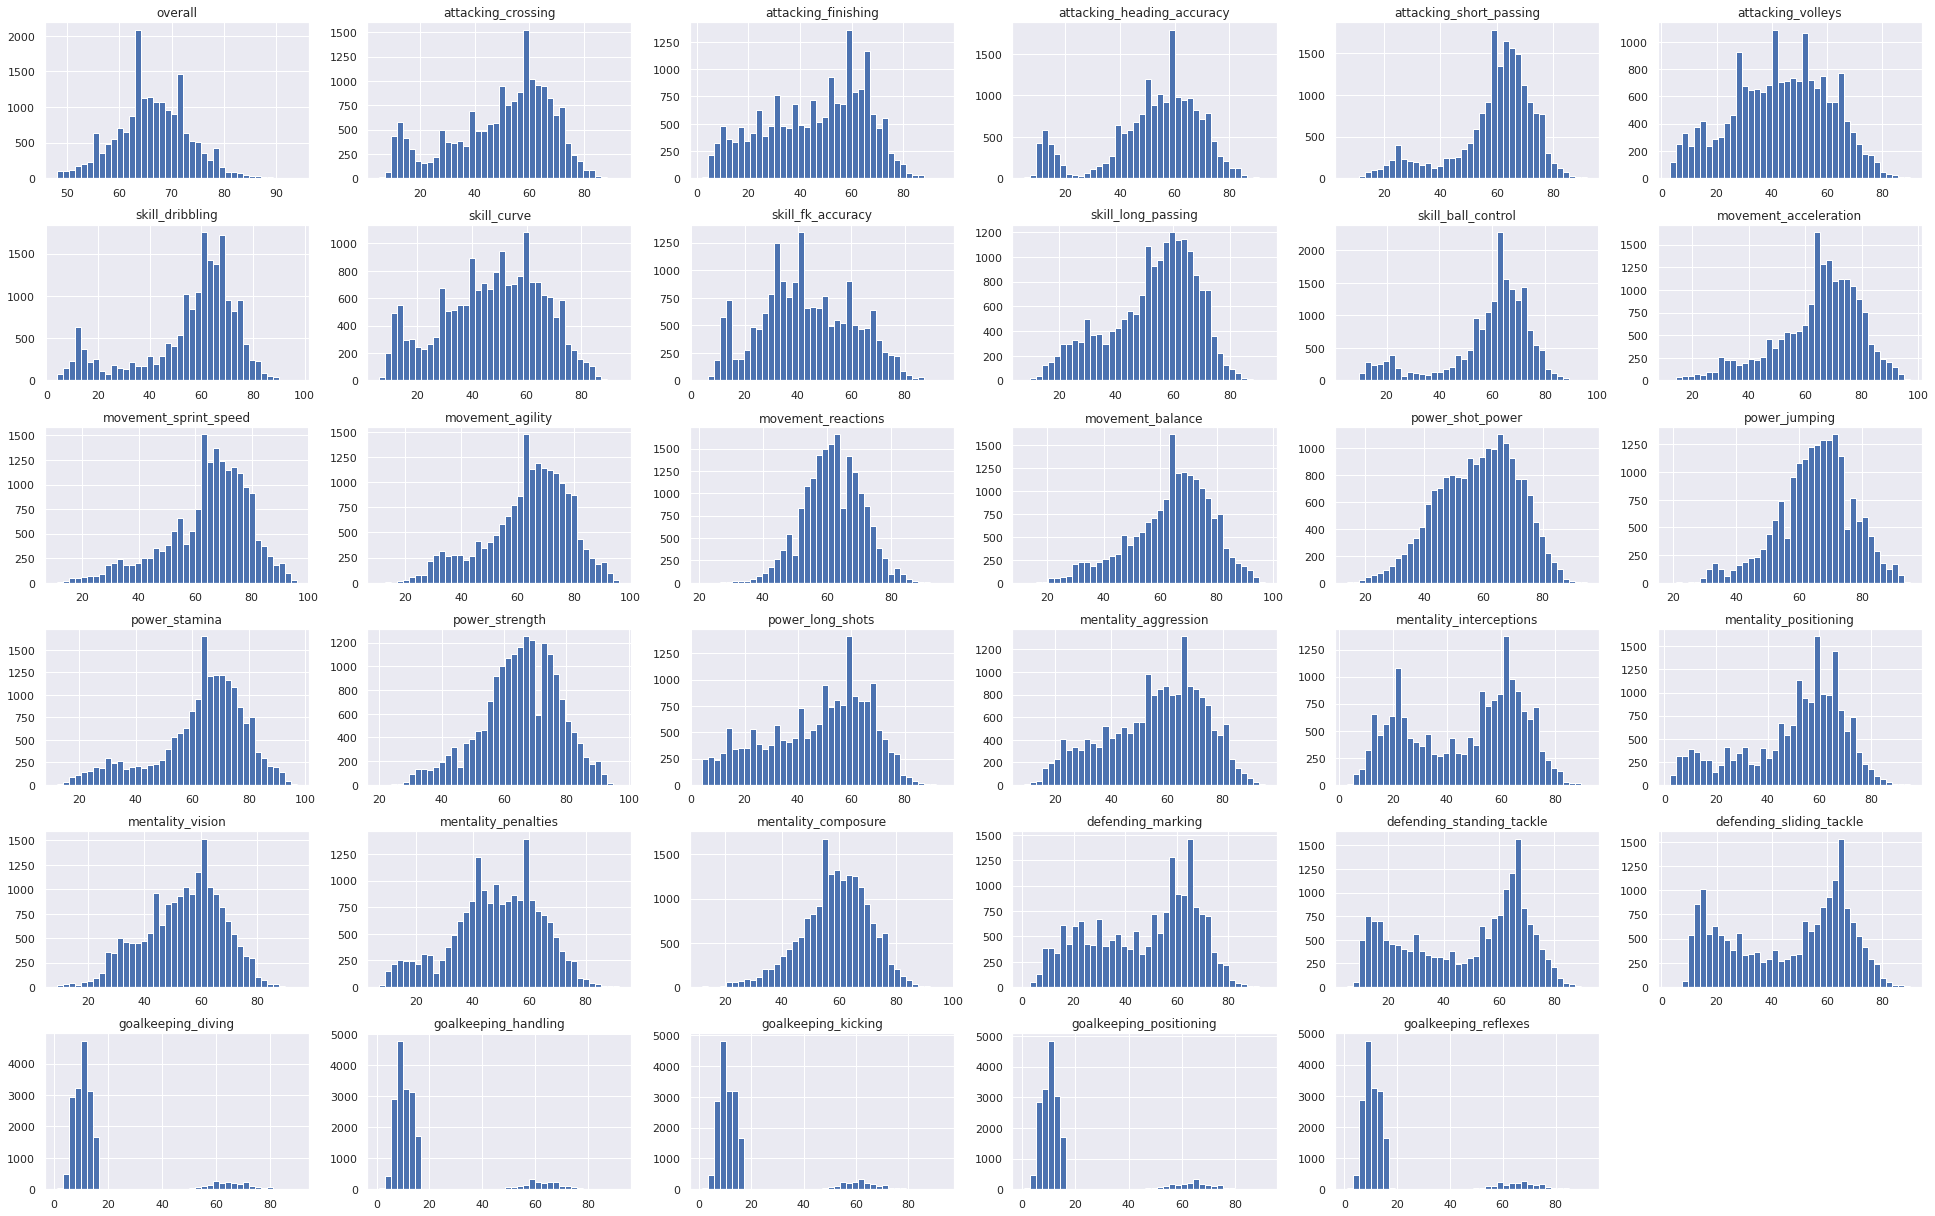

In [ ]:
player_df.hist(bins=40, figsize=(27,17))
save_fig("attribute_histogram_plots")
plt.show()

In [ ]:
player_df.isna().any()

overall                       False
attacking_crossing            False
attacking_finishing           False
attacking_heading_accuracy    False
attacking_short_passing       False
attacking_volleys             False
skill_dribbling               False
skill_curve                   False
skill_fk_accuracy             False
skill_long_passing            False
skill_ball_control            False
movement_acceleration         False
movement_sprint_speed         False
movement_agility              False
movement_reactions            False
movement_balance              False
power_shot_power              False
power_jumping                 False
power_stamina                 False
power_strength                False
power_long_shots              False
mentality_aggression          False
mentality_interceptions       False
mentality_positioning         False
mentality_vision              False
mentality_penalties           False
mentality_composure           False
defending_marking           

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(player_df, test_size=0.2, random_state=42)
print("Length of training data:", len(train_set))
print("Length of testing data:", len(test_set))
print("Length of total data:", len(player_df))

Length of training data: 14622
Length of testing data: 3656
Length of total data: 18278


In [ ]:
fifa_df = train_set.copy()
corr_matrix = fifa_df.corr()
corr_matrix['overall'].sort_values(ascending=False)

overall                       1.000000
movement_reactions            0.865583
mentality_composure           0.719927
power_shot_power              0.570048
mentality_vision              0.509595
attacking_short_passing       0.506783
skill_long_passing            0.492170
skill_ball_control            0.461000
power_long_shots              0.428551
skill_curve                   0.418644
mentality_aggression          0.404848
attacking_volleys             0.398905
attacking_crossing            0.392936
skill_fk_accuracy             0.391248
skill_dribbling               0.375421
power_stamina                 0.373520
power_strength                0.364329
mentality_positioning         0.359833
attacking_heading_accuracy    0.352435
mentality_penalties           0.352399
attacking_finishing           0.346992
mentality_interceptions       0.316495
defending_marking             0.303238
power_jumping                 0.272588
movement_agility              0.257805
defending_standing_tackle

Saving figure scatter_matrix_plot


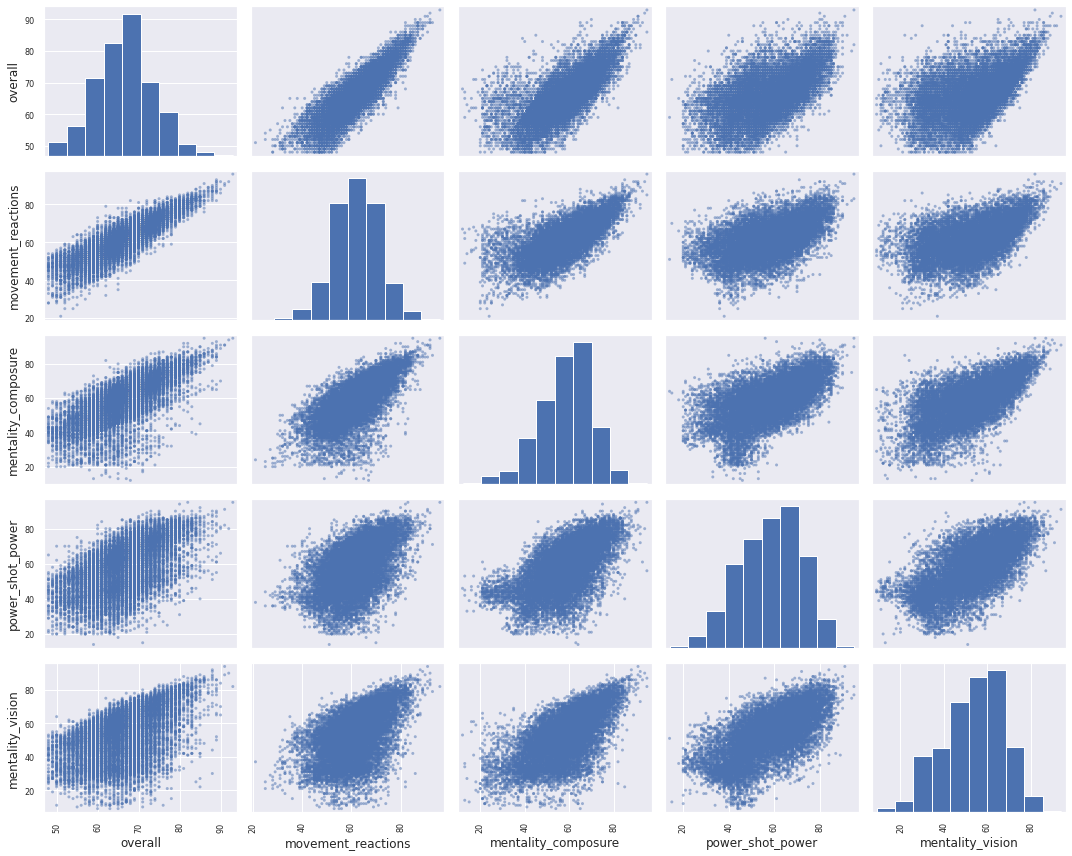

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['overall', 'movement_reactions', 'mentality_composure', 'power_shot_power', 'mentality_vision']

scatter_matrix(fifa_df[attributes], figsize=(15,12))
save_fig("scatter_matrix_plot")
plt.show()

Saving figure movent_reactions_vs_overall


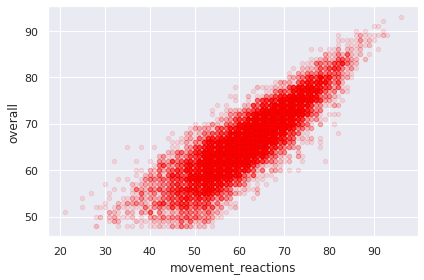

In [ ]:
fifa_df.plot(kind='scatter', x='movement_reactions', y='overall', alpha=0.1, color='red')
save_fig("movent_reactions_vs_overall")
plt.show()

In [ ]:
y_train = train_set['overall']
X_train = train_set.drop('overall', axis=1)
y_test = test_set['overall']
X_test = test_set.drop('overall', axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error
y_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.493574884183225

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, y_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, y_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.47533160142050984

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_train, y_train,
                         scoring='neg_mean_squared_error', cv=10)
lin_reg_scores = np.sqrt(-scores)

def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard Deviation:", scores.std())


display_scores(lin_reg_scores)

Scores: [2.48985397 2.509888   2.50910312 2.4642167  2.46189444 2.51445854
 2.48370267 2.4734443  2.48382446 2.59475861]
Mean: 2.4985144826450054
Standard Deviation: 0.03662607159427437


In [ ]:
scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring='neg_mean_squared_error', cv=10)
tree_scores = np.sqrt(-scores)

display_scores(tree_scores)

Scores: [2.03976196 2.10100389 2.24933491 2.18751588 2.13289653 2.1158318
 2.10529916 2.08391009 2.30935171 2.15395796]
Mean: 2.147886387907302
Standard Deviation: 0.07682311253910523


In [ ]:
scores = cross_val_score(forest_reg, X_train, y_train,
                         scoring='neg_mean_squared_error', cv=10)
forest_scores = np.sqrt(-scores)

display_scores(forest_scores)

Scores: [1.28599451 1.25577066 1.26048055 1.28913218 1.22224581 1.32052095
 1.26213369 1.24670855 1.29536002 1.29481902]
Mean: 1.273316594605864
Standard Deviation: 0.027388455192038


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},          
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(np.sqrt(-mean_score), params)

2.058332818189461 {'max_features': 2, 'n_estimators': 3}
1.5514321988776334 {'max_features': 2, 'n_estimators': 10}
1.385669084676041 {'max_features': 2, 'n_estimators': 30}
1.7750959250262748 {'max_features': 4, 'n_estimators': 3}
1.3789230700927262 {'max_features': 4, 'n_estimators': 10}
1.2261339063223007 {'max_features': 4, 'n_estimators': 30}
1.7436365174931414 {'max_features': 6, 'n_estimators': 3}
1.3519265061752852 {'max_features': 6, 'n_estimators': 10}
1.2069345389893698 {'max_features': 6, 'n_estimators': 30}
1.6790041308945691 {'max_features': 8, 'n_estimators': 3}
1.323151223019892 {'max_features': 8, 'n_estimators': 10}
1.198969462072868 {'max_features': 8, 'n_estimators': 30}
1.9895676915915033 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1.4925649882053742 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1.8158804023208406 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1.3693550469861167 {'bootstrap': False, 'max_features': 3, 'n_est

In [ ]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

1.133257039307841

In [ ]:
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([1.09906776, 1.16644464])

In [ ]:
some_data = X_test.iloc[:5]
some_label = y_test.iloc[:5]

print("Predictions:", final_model.predict(some_data))
print("Labels:", list(some_label))

Predictions: [64.83333333 74.         69.1        67.83333333 63.26666667]
Labels: [64, 74, 69, 68, 63]
